In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decomposition import SVD, PCA
from sklearn.datasets import load_digits # digit dataset

### Singular Value Decomposition (SVD)

**Important :** SVD takes an original data set matrix here called $A$ and decomposes it into three matrices called $U$, $\sum$ and $V^T$.

$A = U \sum V^T$ where $A_{mxn}, U_{mxm}, \sum_{mxn}$ and $V^T_{nxn}$

- $\sum$ represents the singular values which are the square root of the eigenvalues of $AA^T$.
- Explaind variance by each singular value is approximately its square value 

**Example:**

$A = \begin{bmatrix} 1 & 1 \\ 0 & 1 \\-1 & 1 \end{bmatrix}$

**SVD or factorization:**

$A = U \sum V^T$

**Identify the unkowns:**

$V^T = eigenvectors(A^T.A)^T = \begin{bmatrix} v_1 \\ v_2 \end{bmatrix}$

$U = \begin{bmatrix} \frac{1}{\sigma_1}Av_1 & \frac{1}{\sigma_2}Av_2 & \frac{NS(A^T)}{|NS(A^T)|} \end{bmatrix}$

$\sum = \begin{bmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \\0 & 0 \end{bmatrix}$ $\leftrightarrow$ $\sigma_n=\sqrt{\lambda_n}$

$A = \begin{bmatrix} \frac{1}{\sigma_1}Av_1 & \frac{1}{\sigma_2}Av_2 & \frac{NS(A^T)}{|NS(A^T)|} \end{bmatrix} \begin{bmatrix} \sigma_1 & 0 \\ 0 & \sigma_2 \\0 & 0 \end{bmatrix} \begin{bmatrix} v_1 & v_2 \end{bmatrix}^T$

**Find all values:**

$A = \begin{bmatrix} 1 & 1 \\ 0 & 1 \\-1 & 1 \end{bmatrix}$ $\rightarrow$ $A^TA = \begin{bmatrix} 2 & 0 \\ 0 & 3\end{bmatrix}$ $\rightarrow$ ${\lambda_1,\lambda_2} = {3,2}$ $\rightarrow$ ${\sigma_1,\sigma_2} = {\sqrt3,\sqrt2}$ $\rightarrow$ $\sum = \begin{bmatrix} \sqrt3 & 0 \\ 0 & \sqrt2 \\0 & 0 \end{bmatrix}$

$(A - \lambda I)V=0$  $\rightarrow$ $eigenvectors(v_1,v_2) = \begin{bmatrix} 0\\1 \end{bmatrix}$ and $\begin{bmatrix} 1\\ 0 \end{bmatrix}$ $\rightarrow$ $V^T = \begin{bmatrix} 0 & 1\\1 & 0\\ \end{bmatrix}$

$U = \begin{bmatrix} \frac{1}{\sqrt3 }\begin{bmatrix} 1 & 1 \\ 0 & 1 \\-1 & 1 \end{bmatrix}\begin{bmatrix} 0 \\1 \end{bmatrix} & \frac{1}{\sqrt2 }\begin{bmatrix} 1 & 1 \\ 0 & 1 \\-1 & 1 \end{bmatrix}\begin{bmatrix} 1 \\0 \end{bmatrix}& \frac{NS(A^T)}{|NS(A^T)|}\end{bmatrix}$

$NS(A^T)$ $\rightarrow$ $A^TX = 0$ $\rightarrow$ $\begin{bmatrix} 1 & 1 & 1\\ 1 & 0 & -1 \end{bmatrix}\begin{bmatrix} x_1\\ x_2 \\ x_3 \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0 \end{bmatrix}$ $\rightarrow$ $NS(A^T) = \begin{bmatrix} 1 \\ -2 \\ 1 \end{bmatrix}$ $\rightarrow$ $|NS(A^T)| = \sqrt{1+4+1} = \sqrt 6$

$U = \begin{bmatrix} \frac{1}{\sqrt3} & \frac{1}{\sqrt2} & \frac{1}{\sqrt6}\\ \frac{1}{\sqrt3} & 0 & \frac{-2}{\sqrt6}  \\ \frac{1}{\sqrt3} & \frac{-1}{\sqrt2} & \frac{1}{\sqrt6} \end{bmatrix}$

![title](svd.png)

Schematic representation of the singular value decomposition. The matrix Data is being decomposed here. The light gray areas show the original data, and the dark gray areas show the only data used in the matrix approximation.

In [5]:
def loadExData():
    return np.array([[2, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],
                     [0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0],
                     [3, 3, 4, 0, 3, 0, 0, 2, 2, 0, 0],
                     [5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
                     [4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 5],
                     [0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4],
                     [0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0],
                     [0, 0, 0, 3, 0, 0, 0, 0, 4, 5, 0],
                     [1, 1, 2, 1, 1, 2, 1, 0, 4, 5, 0]])

def loadExData2():
    return np.array([[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
                     [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
                     [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
                     [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
                     [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
                     [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
                     [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
                     [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
                     [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
                     [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
                     [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]])

(11, 11)


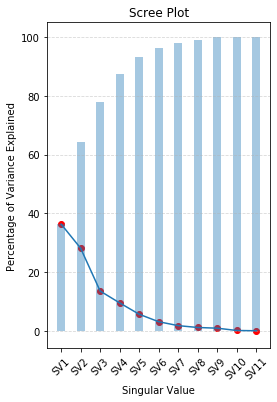

Explained variance ratio:
 [0.363 0.281 0.135 0.095 0.056 0.031 0.017 0.011 0.009 0.001 0.   ]

Cumulative explained variance ratio:
 [0.363 0.644 0.779 0.874 0.93  0.961 0.978 0.989 0.998 0.999 0.999]


In [6]:
A = loadExData()
print(A.shape)
svd = SVD()
svd.fit(A)
svd.screePlot()
# let’s find the number of singular values that give you 90% of the total varience
exVarRatio = np.round(svd.explained_variance_ratio_,3)
print("Explained variance ratio:\n", exVarRatio)
print("\nCumulative explained variance ratio:\n", np.cumsum(exVarRatio))

In [7]:
# So we can reduce the matrix from an 11-dimensional matrix to a 4-dimensional matrix
# matrix reduction by keeping only the first four singular values
svd = SVD(4)
redA = svd.fit_transform(A)
np.round(redA, 2) 

array([[-1.99,  1.17, -1.37, -3.26],
       [-0.73,  1.23,  4.39, -0.7 ],
       [-2.56, -2.18,  0.13,  0.02],
       [-4.63,  4.33, -2.26, -0.3 ],
       [-5.05,  6.01, -2.04,  2.4 ],
       [-4.57, -4.43,  0.81,  2.62],
       [-3.75,  4.85,  3.79,  0.43],
       [-0.95,  1.  ,  4.53, -1.32],
       [-4.57, -4.43,  0.81,  2.62],
       [-4.81, -3.25, -0.63, -3.35],
       [-6.53, -1.7 , -0.45, -1.83]])

In [7]:
# reconstructing an approximation of the original matrix
apxA = svd.inv_transform(A)
np.round(apxA, 2) 

array([[ 1.03,  0.56,  0.81,  2.14,  1.79,  0.46, -1.65,  0.31,  2.16,
         0.5 , -0.17],
       [ 0.42, -0.73,  0.39, -0.08, -0.34,  1.33, -0.06, -0.17, -0.14,
        -0.03,  4.36],
       [-0.07, -0.03,  0.02,  0.49,  0.12,  0.26,  1.48,  0.06,  0.92,
         2.82, -0.06],
       [ 3.76,  2.98,  3.92,  0.95,  1.75, -0.07, -0.5 ,  0.66,  1.49,
         0.37, -0.2 ],
       [ 4.9 ,  4.06,  5.34, -0.51,  1.06, -0.48,  0.49,  0.71,  0.23,
        -0.27,  0.08],
       [-0.18,  0.15,  0.24, -0.53, -0.82,  0.12,  4.22,  0.01,  0.45,
         5.37, -0.08],
       [ 3.29,  1.49,  3.49, -0.3 ,  0.28,  1.26,  0.14,  0.22,  0.06,
        -0.17,  5.  ],
       [ 0.33, -0.9 ,  0.25,  0.27, -0.15,  1.51, -0.22, -0.17,  0.21,
         0.25,  4.55],
       [-0.18,  0.15,  0.24, -0.53, -0.82,  0.12,  4.22,  0.01,  0.45,
         5.37, -0.08],
       [-0.01, -0.24, -0.14,  2.77,  1.63,  0.91,  0.66,  0.25,  3.31,
         4.75, -0.19],
       [ 1.43,  0.91,  1.52,  2.14,  1.53,  0.83,  1.46,  0.

### PCA using SVD for dimentionality reduction 

In [8]:
## PCA using eigenvector decomposition
## important: If you center the matrix X and the result of the eigenvector decomposition and SVD are equal
## meaning that the final reduced matrix are the same

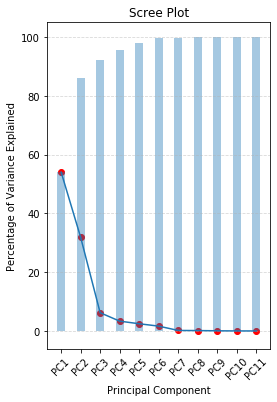

Explained variance ratio by components:
 [0.541 0.319 0.062 0.033 0.025 0.016 0.002 0.001 0.    0.    0.   ]

Cumulative explained variance ratio:
 [0.541 0.86  0.922 0.955 0.98  0.996 0.998 0.999 0.999 0.999 0.999]


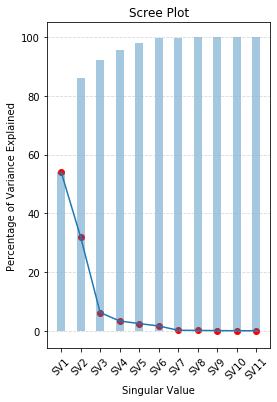

Explained variance ratio by singular values:
 [0.541 0.319 0.062 0.033 0.025 0.016 0.002 0.001 0.    0.    0.   ]

Cumulative explained variance ratio:
 [0.541 0.86  0.922 0.955 0.98  0.996 0.998 0.999 0.999 0.999 0.999]


In [10]:
X = loadExData2()
pca = PCA()
pca.fit(X)
pca.screePlot()
exVarRatio = np.round(pca.explained_variance_ratio_,3)
print("Explained variance ratio by components:\n", exVarRatio)
print("\nCumulative explained variance ratio:\n", np.cumsum(exVarRatio))

svd = SVD()
Xc = X - X.mean(axis=0)
svd.fit(Xc)
svd.screePlot()
exVarRatio = np.round(svd.explained_variance_ratio_,3)
print("Explained variance ratio by singular values:\n", exVarRatio)
print("\nCumulative explained variance ratio:\n", np.cumsum(exVarRatio))

### Image compression with the SVD

- The load_digits dataset contains 1797 8x8 images. 
- If you specify `return_X_y=True` the function will return the pixels as a one dimensional array.
- `y` contains the labels for every digit.

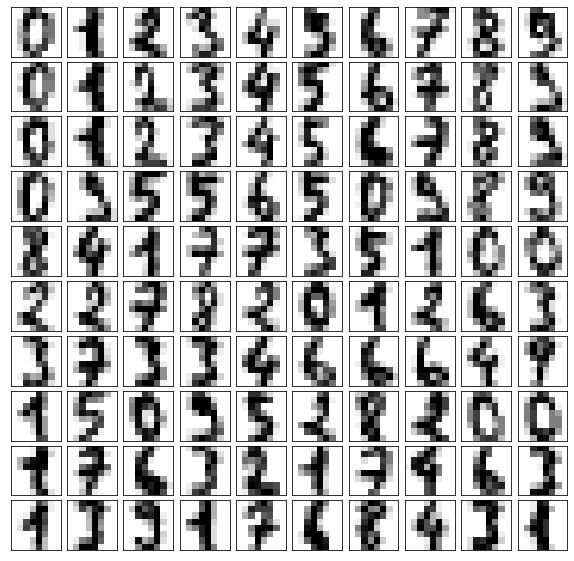

In [12]:
X, y = load_digits(return_X_y=True)

fig, axes = plt.subplots(10,10,figsize=(10,10), subplot_kw={'xticks':[], 'yticks':[]} ,gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(8,8),cmap="gray_r")

Cumulative explained variance ratio:
 [0.82 0.94 0.98 1.   1.   1.   1.   1.  ]


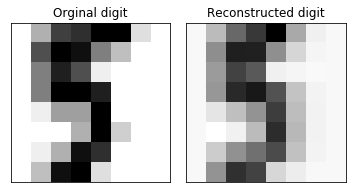

In [14]:
i = 15
imageMat = X[i].reshape(8,8)
sv = SVD()
sv.fit(imageMat)
explained_varience_ratio = sv.explained_variance_ratio_
print("Cumulative explained variance ratio:\n", np.round(np.cumsum(explained_varience_ratio),2))

# number of singular values
n_sv = 2
sv = SVD(n_sv)
redImage = sv.fit_transform(imageMat)
apxImage = sv.inv_transform(imageMat)

fig, axes = plt.subplots(1,2,figsize=(6,6), subplot_kw={'xticks':[], 'yticks':[]} ,gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].imshow(X[i].reshape(8,8),cmap="gray_r")
axes[0].set_title("Orginal digit");
axes[1].imshow(apxImage, cmap = 'gray_r')
axes[1].set_title("Reconstructed digit");